# Project Overview 

- Performing an Customer segmentation analysis of a Company's customers data and product analysis with regards to bussiness understanding of customers purchases, amount spending, marketing campaign or customers who are more likely to buy products across various categories of goods.

### Problem Statement 
- __Understanding Customers experience and dig out insights to target more growth in purchases, generate more revenue__.
- __Getting insights on marketing campaigns and improve future campaigns__.
    
### Tasks
- __Understanding data feature, Data cleaning, Data explorations, Feature Scaling__.
- __Exploratory Data analysis, Clustering Models, Clustering analysis to Providing business insights__.



In [ ]:
#Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)

In [30]:
data = pd.read_csv('marketing_data.csv')

In [31]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [32]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

### Data explorations and feature engineering

Recency                   AxesSubplot(0.125,0.657941;0.133621x0.222059)
MntWines               AxesSubplot(0.285345,0.657941;0.133621x0.222059)
MntFruits               AxesSubplot(0.44569,0.657941;0.133621x0.222059)
MntMeatProducts        AxesSubplot(0.606034,0.657941;0.133621x0.222059)
MntFishProducts        AxesSubplot(0.766379,0.657941;0.133621x0.222059)
MntSweetProducts          AxesSubplot(0.125,0.391471;0.133621x0.222059)
MntGoldProds           AxesSubplot(0.285345,0.391471;0.133621x0.222059)
NumDealsPurchases       AxesSubplot(0.44569,0.391471;0.133621x0.222059)
NumWebPurchases        AxesSubplot(0.606034,0.391471;0.133621x0.222059)
NumCatalogPurchases    AxesSubplot(0.766379,0.391471;0.133621x0.222059)
NumStorePurchases            AxesSubplot(0.125,0.125;0.133621x0.222059)
NumWebVisitsMonth         AxesSubplot(0.285345,0.125;0.133621x0.222059)
age                        AxesSubplot(0.44569,0.125;0.133621x0.222059)
NumKids                   AxesSubplot(0.606034,0.125;0.133621x0.

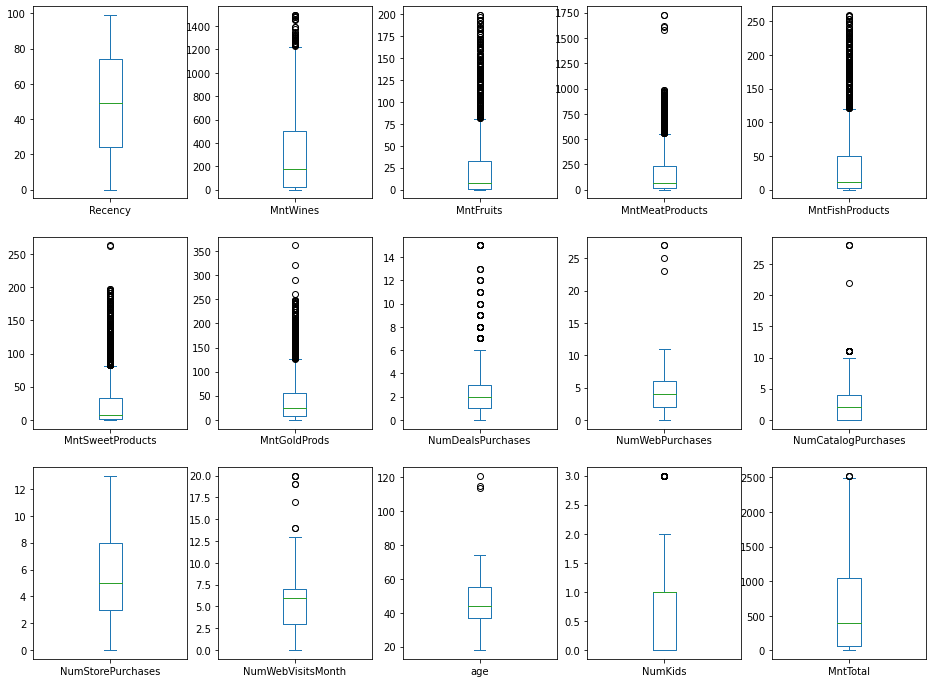

In [33]:
data['age'] = 2014 - data['Year_Birth']
data['NumKids'] = data['Kidhome']+data['Teenhome']
data['MntTotal'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
data1 = data.drop(columns=['Year_Birth','Kidhome','Teenhome','ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)

data1.plot(subplots=True, layout=(3,5), kind='box', figsize=(16,12))


In [34]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,age,NumKids,MntTotal
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,0,1190
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,0,577
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56,1,251
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47,2,11
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25,1,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,18,126,47,48,78,2,5,2,11,4,0,0,0,0,0,0,0,US,38,1,689
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,10,13,3,8,16,1,1,0,3,8,0,0,0,0,0,0,0,SP,37,1,55
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,2,88,15,5,14,2,6,1,5,8,0,0,0,0,0,0,0,SP,38,1,309
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,38,701,149,165,63,1,5,4,10,3,0,0,0,0,0,0,0,IND,36,0,1383


In [36]:
data['Dt_Customer']=pd.to_datetime(data['Dt_Customer'])

data['age'] = 2014 - data['Year_Birth']

Data is upto only 2014 year

In [38]:

data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,age,NumKids,MntTotal
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,0,1190
1,1,1961,Graduation,Single,"$57,091.00",0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,0,577
2,10476,1958,Graduation,Married,"$67,267.00",0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56,1,251
3,1386,1967,Graduation,Together,"$32,474.00",1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47,2,11
4,5371,1989,Graduation,Single,"$21,474.00",1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25,1,91
5,7348,1958,PhD,Single,"$71,691.00",0,0,2014-03-17,0,336,130,411,240,32,43,1,4,7,5,2,0,0,0,0,0,1,0,SP,56,0,1192
6,4073,1954,2n Cycle,Married,"$63,564.00",0,0,2014-01-29,0,769,80,252,15,34,65,1,10,10,7,6,1,0,0,0,0,1,0,GER,60,0,1215
7,1991,1967,Graduation,Together,"$44,931.00",0,1,2014-01-18,0,78,0,11,0,0,7,1,2,1,3,5,0,0,0,0,0,0,0,SP,47,1,96
8,4047,1954,PhD,Married,"$65,324.00",0,1,2014-01-11,0,384,0,102,21,32,5,3,6,2,9,4,0,0,0,0,0,0,0,US,60,1,544
9,9477,1954,PhD,Married,"$65,324.00",0,1,2014-01-11,0,384,0,102,21,32,5,3,6,2,9,4,0,0,0,0,0,0,0,IND,60,1,544


#### Exploratory data analysis

- Now here getting some info about customers from different accepted markeing campaigns and to know the counts, max, mix, mean values to know some distributions by grouping w.r.t to different campaigns


In [46]:
g1=data.groupby(['AcceptedCmp1'])
print(g1.agg({'Dt_Customer':['count', 'min', 'max']}))

g2=data.groupby(['AcceptedCmp2'])
print(g2.agg({'Dt_Customer':['count', 'min', 'max']}))

g3=data.groupby(['AcceptedCmp3'])
print(g3.agg({'Dt_Customer':['count', 'min', 'max']}))

g4=data.groupby(['AcceptedCmp4'])
print(g4.agg({'Dt_Customer':['count', 'min', 'max']}))

g5=data.groupby(['AcceptedCmp5'])
print(g5.agg({'Dt_Customer':['count', 'min', 'max']}))


             Dt_Customer                      
                   count        min        max
AcceptedCmp1                                  
0                   2096 2012-07-30 2014-06-29
1                    144 2012-08-18 2014-06-28
             Dt_Customer                      
                   count        min        max
AcceptedCmp2                                  
0                   2210 2012-07-30 2014-06-29
1                     30 2012-08-18 2014-06-17
             Dt_Customer                      
                   count        min        max
AcceptedCmp3                                  
0                   2077 2012-07-30 2014-06-29
1                    163 2012-08-01 2014-06-26
             Dt_Customer                      
                   count        min        max
AcceptedCmp4                                  
0                   2073 2012-07-30 2014-06-29
1                    167 2012-08-04 2014-06-29
             Dt_Customer                      
             

In [50]:
gR=data.groupby(['Response','Dt_Customer'])
gR.agg({'Dt_Customer':['count', 'min', 'max']})

Dt_Customer                      
                           count        min        max
Response Dt_Customer                                  
0        2012-07-31            1 2012-07-31 2012-07-31
         2012-08-01            2 2012-08-01 2012-08-01
         2012-08-02            3 2012-08-02 2012-08-02
         2012-08-03            4 2012-08-03 2012-08-03
         2012-08-04            3 2012-08-04 2012-08-04
...                          ...        ...        ...
1        2014-06-07            1 2014-06-07 2014-06-07
         2014-06-15            1 2014-06-15 2014-06-15
         2014-06-16            1 2014-06-16 2014-06-16
         2014-06-17            1 2014-06-17 2014-06-17
         2014-06-23            1 2014-06-23 2014-06-23

[886 rows x 3 columns]

In [51]:
gR=data.groupby(['Response'])
gR.agg({'Dt_Customer':['count', 'min', 'max']})

Dt_Customer                      
               count        min        max
Response                                  
0               1906 2012-07-31 2014-06-29
1                334 2012-07-30 2014-06-23

In [52]:
data['Income']=data[' Income ']

data['Income']=data.Income.str.replace('$','')

data['Income']=data.Income.str.replace(',','')#.astype("Int64")

data['Income']=data.Income.astype("float")
data = data.drop([' Income '], axis=1)

<ipython-input-52-caf148d1536e>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Income']=data.Income.str.replace('$','')


In [54]:
data.columns


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'age', 'NumKids',
       'MntTotal', 'Income'],
      dtype='object')

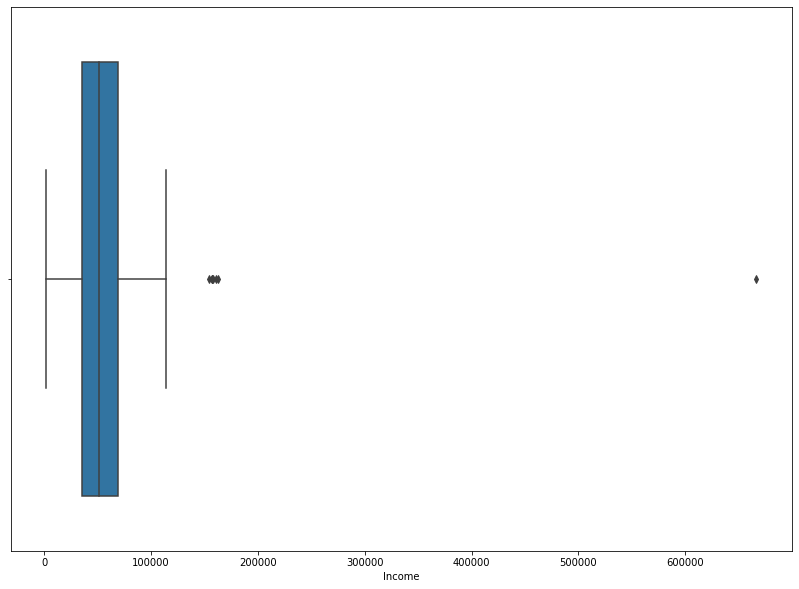

In [55]:
plt.figure(figsize=(14,10))

ax=sns.boxplot(x = 'Income', data = data)

- Outliers found in Income feature which can be dropped

c:\users\kartikhp\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

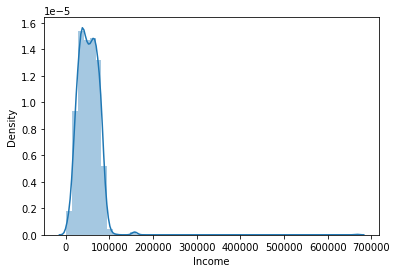

In [57]:
sns.distplot(data['Income'])

In [60]:
data.Income.isnull().sum()

24

- to fill these null values with median of the data given so fit it good in model building

In [61]:
data['Income'].fillna((data['Income'].median()), inplace=True)
data.Income.isnull().sum()

0

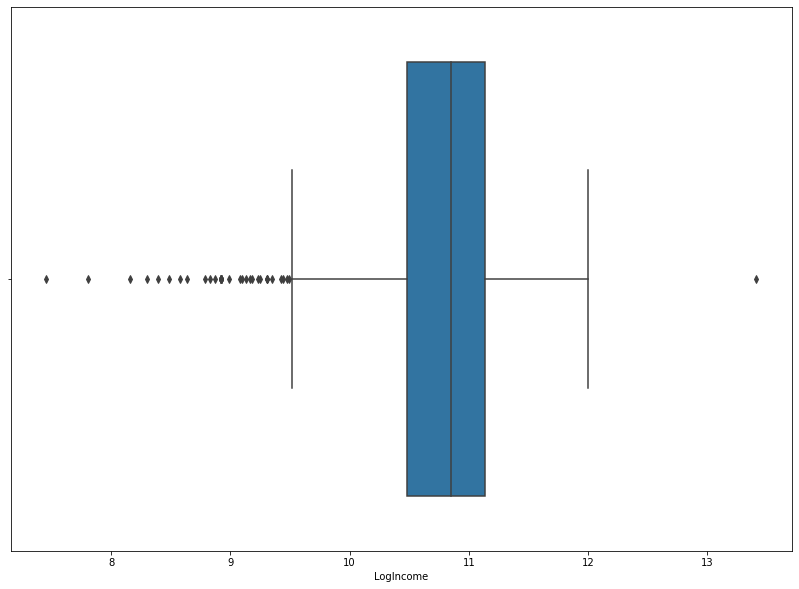

In [62]:
data['LogIncome'] = np.log1p(data['Income'])
plt.figure(figsize=(14,10))

ax=sns.boxplot(x = 'LogIncome', data = data)

In [63]:
data.Education.value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [64]:
data.groupby(['Education','Country'])['Education'].value_counts()

Education   Country  Education 
2n Cycle    AUS      2n Cycle        9
            CA       2n Cycle       24
            GER      2n Cycle       20
            IND      2n Cycle       21
            SA       2n Cycle       25
            SP       2n Cycle       97
            US       2n Cycle        7
Basic       AUS      Basic           4
            CA       Basic           7
            GER      Basic           2
            IND      Basic           4
            SA       Basic           6
            SP       Basic          28
            US       Basic           3
Graduation  AUS      Graduation     85
            CA       Graduation    133
            GER      Graduation     59
            IND      Graduation     76
            ME       Graduation      1
            SA       Graduation    161
            SP       Graduation    548
            US       Graduation     64
Master      AUS      Master         32
            CA       Master         49
            GER      Master     

In [65]:
data['Education'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [66]:
data.loc[data['Education']=='2n Cycle','Education']='Master'

data.loc[data['Education']=='Graduation','Education']='Bachelor'
data['Education'].unique()

array(['Bachelor', 'PhD', 'Master', 'Basic'], dtype=object)

In [67]:
data.groupby(['Country','Education']).Education.value_counts()

Country  Education  Education
AUS      Bachelor   Bachelor      85
         Basic      Basic          4
         Master     Master        41
         PhD        PhD           30
CA       Bachelor   Bachelor     133
         Basic      Basic          7
         Master     Master        73
         PhD        PhD           55
GER      Bachelor   Bachelor      59
         Basic      Basic          2
         Master     Master        40
         PhD        PhD           19
IND      Bachelor   Bachelor      76
         Basic      Basic          4
         Master     Master        42
         PhD        PhD           26
ME       Bachelor   Bachelor       1
         Master     Master         1
         PhD        PhD            1
SA       Bachelor   Bachelor     161
         Basic      Basic          6
         Master     Master        85
         PhD        PhD           85
SP       Bachelor   Bachelor     548
         Basic      Basic         28
         Master     Master       268
        

In [68]:
data.Education.value_counts()

Bachelor    1127
Master       573
PhD          486
Basic         54
Name: Education, dtype: int64

<AxesSubplot:>

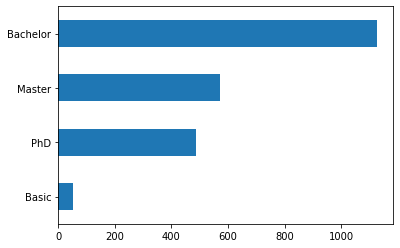

In [69]:
data.Education.value_counts().sort_values().plot(kind = 'barh')

<AxesSubplot:>

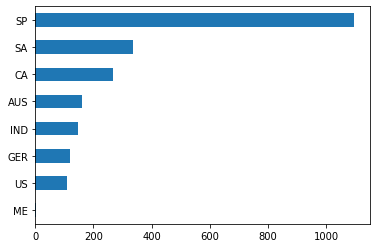

In [70]:
data.Country.value_counts().sort_values().plot(kind = 'barh')

In [71]:
data['Marital_Status'].value_counts()


Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [72]:
data['Kidhome'].value_counts()


0    1293
1     899
2      48
Name: Kidhome, dtype: int64

In [73]:
data['Teenhome'].value_counts()

0    1158
1    1030
2      52
Name: Teenhome, dtype: int64

In [74]:
data['NumChildren']  = data['Kidhome']+data['Teenhome']
data['HasChildren']=np.where(data.NumChildren> 0, 1, 0)
data['HasChildren'].value_counts()

1    1602
0     638
Name: HasChildren, dtype: int64

In [51]:
data['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [75]:
data['HasPartner']=np.where(((data.Marital_Status== 'Married')|(data.Marital_Status== 'Together')), 1, 0)
data['HasPartner'].value_counts()

1    1444
0     796
Name: HasPartner, dtype: int64

In [77]:
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, 'Amounts Spent on Different Products ')

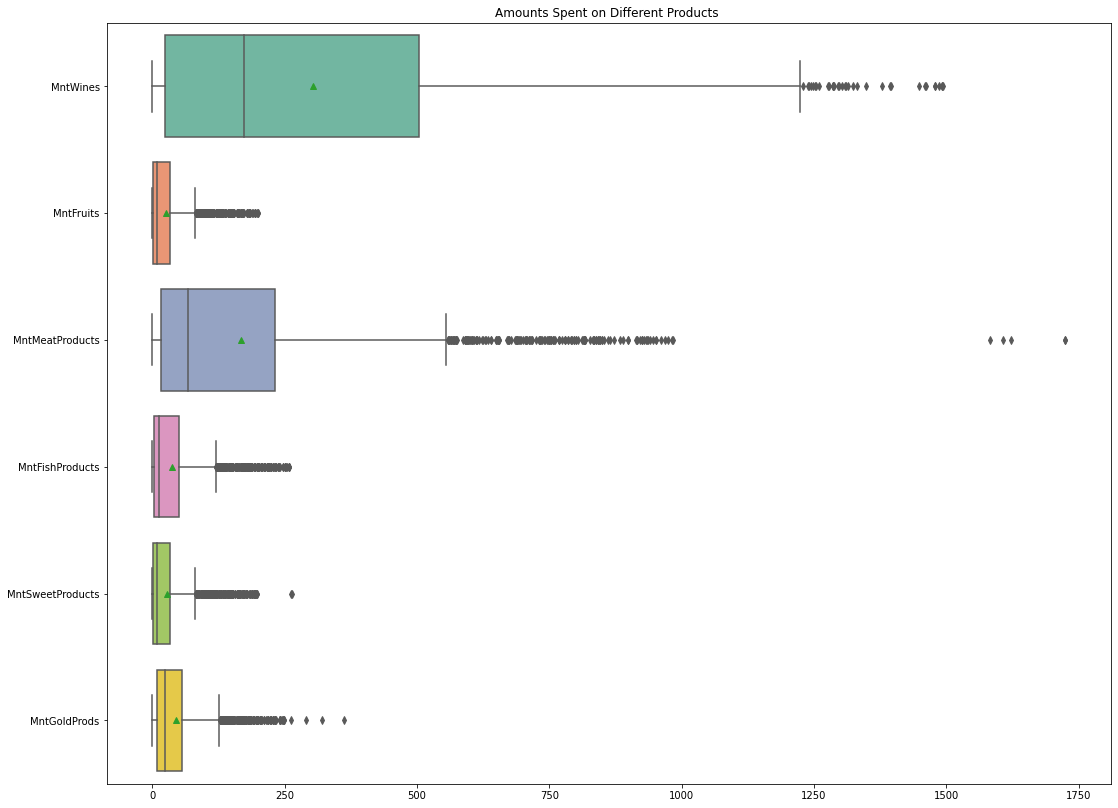

In [78]:
plt.figure(figsize=(18,14))
ax = sns.boxplot(data=data[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']], orient="h", palette="Set2",
                showmeans=True)
plt.title("Amounts Spent on Different Products ") 


Text(0.5, 1.0, 'Numbers of Purchases and Web Visits')

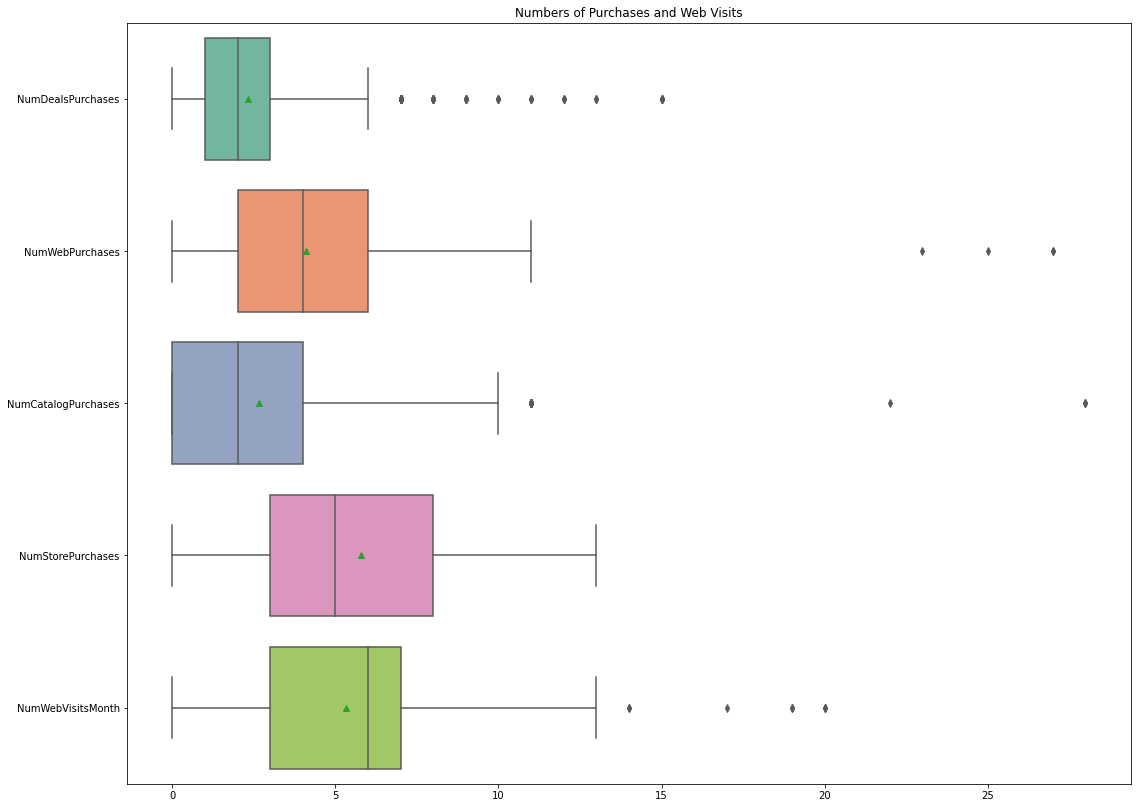

In [79]:
plt.figure(figsize=(18,14))
ax = sns.boxplot(data=data[['NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']], orient="h", palette="Set2",showmeans=True)
plt.title("Numbers of Purchases and Web Visits") 

<AxesSubplot:>

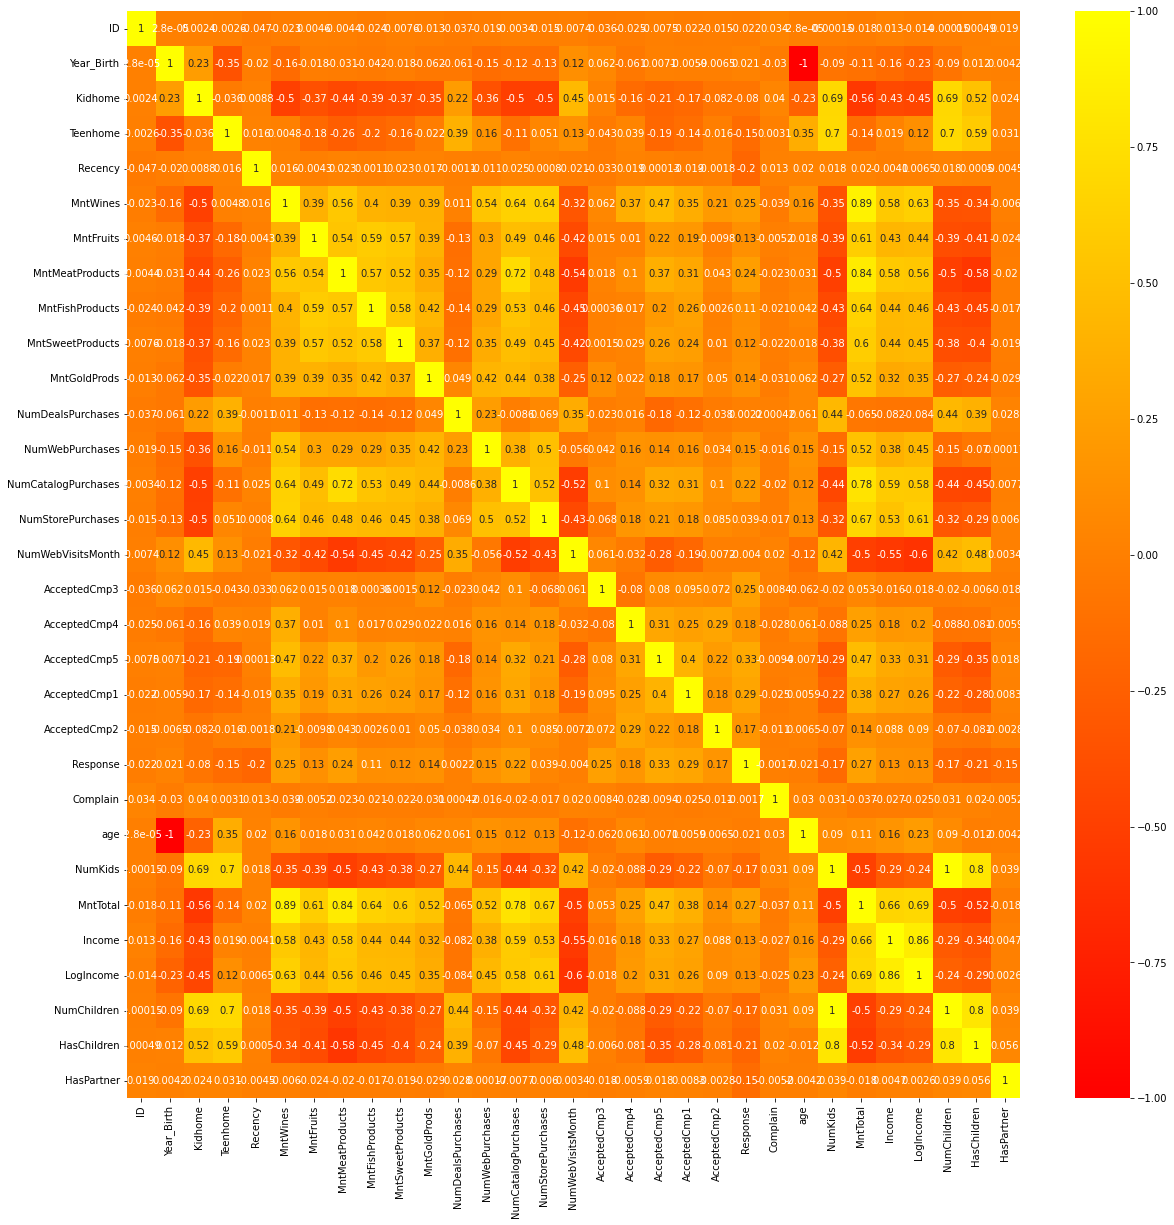

In [82]:
corrs= data.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrs,annot=True, cmap="autumn", center=0)

- __From above I can see that WINE, MEATS corelatted positively with total amounts i.e revenue__.


In [86]:
# For an ease I am adding one more columns as total

data['MntTotal'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

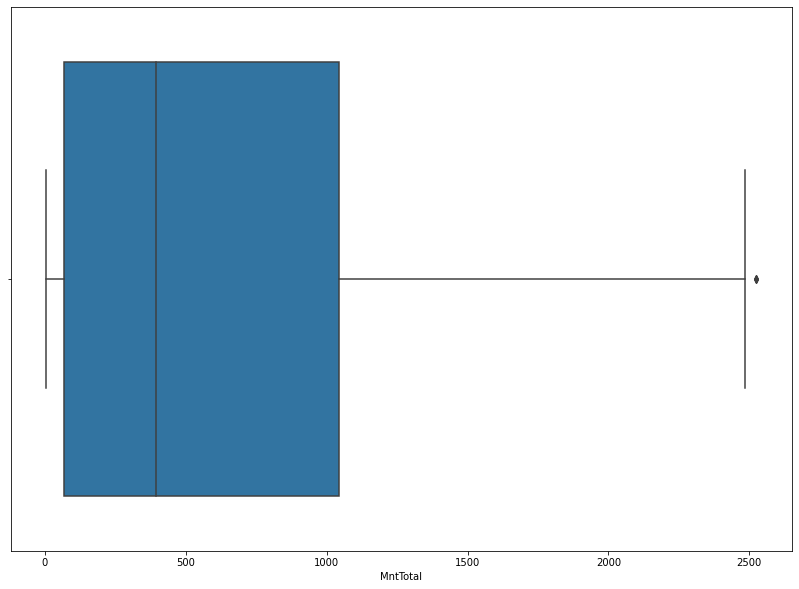

In [84]:
plt.figure(figsize=(14,10))

ax=sns.boxplot(x = 'MntTotal', data = data)

In [85]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'age', 'NumKids',
       'MntTotal', 'Income', 'LogIncome', 'NumChildren', 'HasChildren',
       'HasPartner'],
      dtype='object')

In [88]:
#Add a column to model total number of purchases
data['NumTotalPurchases'] = data['NumDealsPurchases'] + data['NumWebPurchases']+data['NumCatalogPurchases']+\
    data['NumStorePurchases']+data['NumWebVisitsMonth']

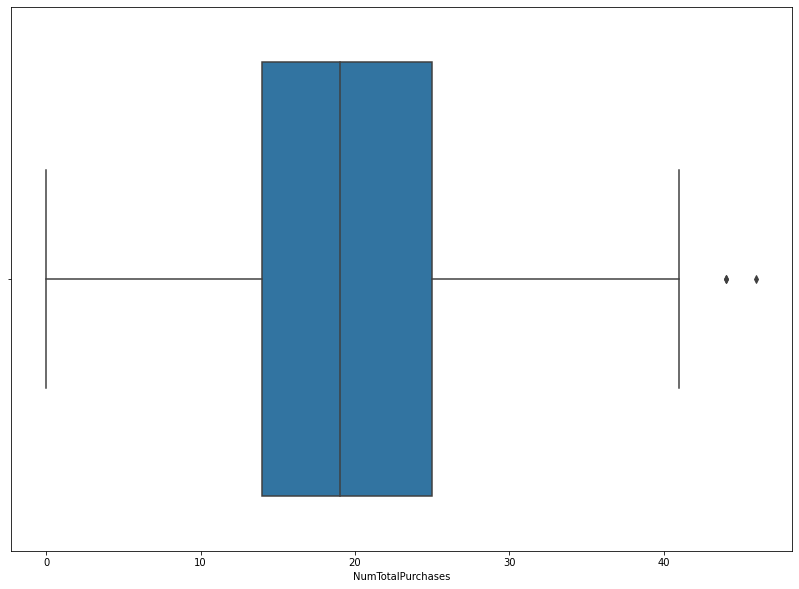

In [89]:
plt.figure(figsize=(14,10))

ax=sns.boxplot(x = 'NumTotalPurchases', data = data)

In [90]:
data['AcceptedCmpTot']=data['AcceptedCmp1']+ data['AcceptedCmp2']+ data['AcceptedCmp3']+ data['AcceptedCmp4']+\
       + data['AcceptedCmp5'] 

In [91]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,age,NumKids,MntTotal,Income,LogIncome,NumChildren,HasChildren,HasPartner,NumTotalPurchases,AcceptedCmpTot
0,1826,1970,Bachelor,Divorced,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,0,1190,84835.0,11.348475,0,0,0,16,0
1,1,1961,Bachelor,Single,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,0,577,57091.0,10.952419,0,0,0,23,1
2,10476,1958,Bachelor,Married,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56,1,251,67267.0,11.116440,1,1,1,13,0
3,1386,1967,Bachelor,Together,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47,2,11,32474.0,10.388226,2,1,1,11,0
4,5371,1989,Bachelor,Single,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25,1,91,21474.0,9.974645,1,1,0,15,1


Text(0.5, 1.0, 'Marketing Campaign Acceptance Rates by customers ')

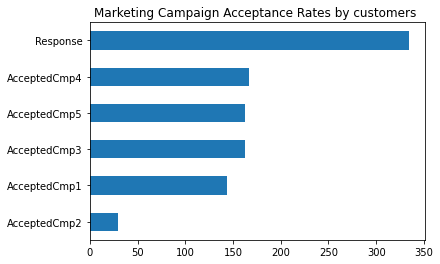

In [95]:
#df[["AcceptedCmp1", "AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","AcceptedCmp1_5","Response","NumDealsPurchases"]].sum().sort_values().plot.barh()
data[["AcceptedCmp1", "AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]].sum().sort_values().plot.barh()

plt.title("Marketing Campaign Acceptance Rates by customers ") 

<AxesSubplot:xlabel='Dt_Customer', ylabel='Count'>

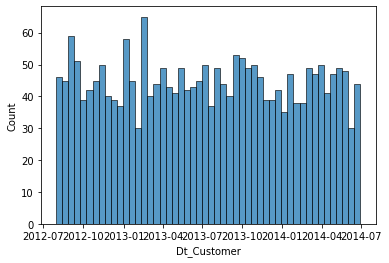

In [96]:
sns.histplot(data=data.Dt_Customer, bins=50)

In [97]:
data1 =data.set_index(['Dt_Customer'])

In [98]:
data1.head()

,ID,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,age,NumKids,MntTotal,Income,LogIncome,NumChildren,HasChildren,HasPartner,NumTotalPurchases,AcceptedCmpTot
Dt_Customer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-06-16,1826,1970,Bachelor,Divorced,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,0,1190,84835.0,11.348475,0,0,0,16,0
2014-06-15,1,1961,Bachelor,Single,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,0,577,57091.0,10.952419,0,0,0,23,1
2014-05-13,10476,1958,Bachelor,Married,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56,1,251,67267.0,11.116440,1,1,1,13,0
2014-05-11,1386,1967,Bachelor,Together,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47,2,11,32474.0,10.388226,2,1,1,11,0
2014-04-08,5371,1989,Bachelor,Single,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25,1,91,21474.0,9.974645,1,1,0,15,1


In [99]:
data1.loc['2014-05-16' : '2014-06-29' ]

,ID,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,age,NumKids,MntTotal,Income,LogIncome,NumChildren,HasChildren,HasPartner,NumTotalPurchases,AcceptedCmpTot
Dt_Customer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-06-16,1826,1970,Bachelor,Divorced,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,0,1190,84835.0,11.348475,0,0,0,16,0
2014-06-15,1,1961,Bachelor,Single,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,0,577,57091.0,10.952419,0,0,0,23,1
2014-06-29,453,1956,PhD,Widow,1,1,1,27,0,12,0,1,5,2,2,0,3,5,0,0,0,0,0,0,0,SP,58,2,45,35340.0,10.472799,2,1,0,12,0
2014-05-31,9687,1975,Bachelor,Single,0,0,1,184,174,256,50,30,32,1,5,4,6,2,0,0,0,0,0,0,0,CA,39,0,726,73170.0,11.200554,0,0,0,18,0
2014-05-30,8890,1971,PhD,Divorced,1,1,1,155,7,80,13,7,10,3,5,1,5,6,0,0,0,0,0,0,0,SP,43,2,272,65808.0,11.094512,2,1,0,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-05-28,213,1963,PhD,Single,1,1,98,35,0,11,0,0,2,4,2,1,3,7,0,0,0,0,0,0,0,SP,51,2,48,23091.0,10.047242,2,1,0,17,0
2014-06-27,2831,1976,Bachelor,Together,0,1,99,453,38,279,188,38,183,2,7,7,10,3,0,0,0,0,0,0,0,SP,38,1,1179,78416.0,11.269796,1,1,1,29,0
2014-06-08,868,1966,Bachelor,Married,0,1,99,54,0,7,0,0,4,1,2,0,3,6,0,0,0,0,0,0,0,SA,48,1,65,44794.0,10.709852,1,1,1,12,0


### Finding the latest date of the available data: Timestamp('2014-10-04 00:00:00')

In [101]:
latest_date=(data["Dt_Customer"] + pd.to_timedelta(data['Recency'],'d')).max()
print(latest_date)

earliest_date=(data["Dt_Customer"]).min()
print(earliest_date)

2014-10-04 00:00:00
2012-07-30 00:00:00


In [102]:
data['Len_Customer']=latest_date - data["Dt_Customer"]

data['Len_Customer']=data['Len_Customer'] / pd.to_timedelta(1, unit='D') #Convert to float

In [103]:
data1.loc['2014-05-16' : '2014-06-29' ]

,ID,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,age,NumKids,MntTotal,Income,LogIncome,NumChildren,HasChildren,HasPartner,NumTotalPurchases,AcceptedCmpTot
Dt_Customer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-06-16,1826,1970,Bachelor,Divorced,0,0,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,0,1190,84835.0,11.348475,0,0,0,16,0
2014-06-15,1,1961,Bachelor,Single,0,0,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,0,577,57091.0,10.952419,0,0,0,23,1
2014-06-29,453,1956,PhD,Widow,1,1,1,27,0,12,0,1,5,2,2,0,3,5,0,0,0,0,0,0,0,SP,58,2,45,35340.0,10.472799,2,1,0,12,0
2014-05-31,9687,1975,Bachelor,Single,0,0,1,184,174,256,50,30,32,1,5,4,6,2,0,0,0,0,0,0,0,CA,39,0,726,73170.0,11.200554,0,0,0,18,0
2014-05-30,8890,1971,PhD,Divorced,1,1,1,155,7,80,13,7,10,3,5,1,5,6,0,0,0,0,0,0,0,SP,43,2,272,65808.0,11.094512,2,1,0,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-05-28,213,1963,PhD,Single,1,1,98,35,0,11,0,0,2,4,2,1,3,7,0,0,0,0,0,0,0,SP,51,2,48,23091.0,10.047242,2,1,0,17,0
2014-06-27,2831,1976,Bachelor,Together,0,1,99,453,38,279,188,38,183,2,7,7,10,3,0,0,0,0,0,0,0,SP,38,1,1179,78416.0,11.269796,1,1,1,29,0
2014-06-08,868,1966,Bachelor,Married,0,1,99,54,0,7,0,0,4,1,2,0,3,6,0,0,0,0,0,0,0,SA,48,1,65,44794.0,10.709852,1,1,1,12,0


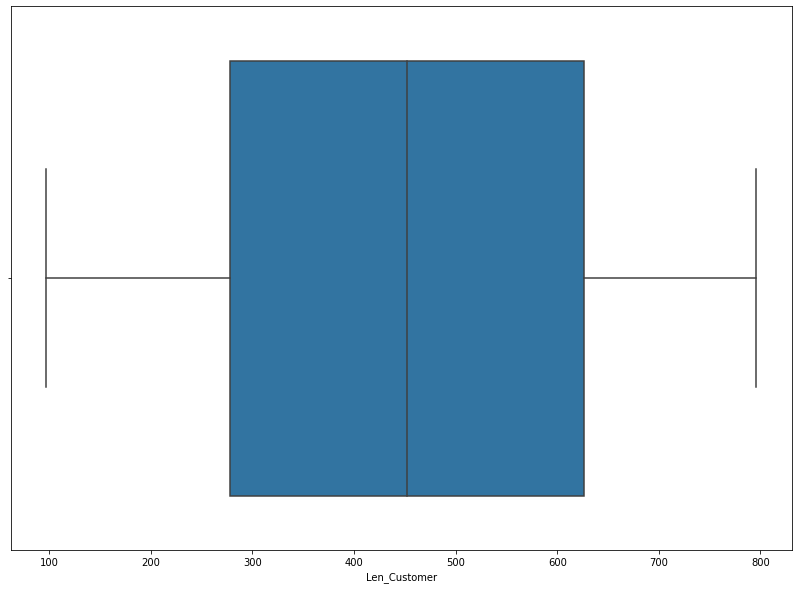

In [104]:
plt.figure(figsize=(14,10))

ax=sns.boxplot(x = 'Len_Customer', data = data)

- There were 796 days between earliest and latest dates.

In [105]:
data.Len_Customer.min()

97.0

<AxesSubplot:xlabel='Len_Customer', ylabel='Count'>

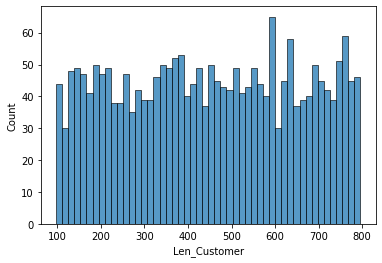

In [106]:
sns.histplot(data=data.Len_Customer, bins=50)

In [107]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,age,NumKids,MntTotal,Income,LogIncome,NumChildren,HasChildren,HasPartner,NumTotalPurchases,AcceptedCmpTot,Len_Customer
0,1826,1970,Bachelor,Divorced,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,0,1190,84835.0,11.348475,0,0,0,16,0,110.0
1,1,1961,Bachelor,Single,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,0,577,57091.0,10.952419,0,0,0,23,1,111.0
2,10476,1958,Bachelor,Married,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56,1,251,67267.0,11.116440,1,1,1,13,0,144.0
3,1386,1967,Bachelor,Together,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47,2,11,32474.0,10.388226,2,1,1,11,0,146.0
4,5371,1989,Bachelor,Single,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25,1,91,21474.0,9.974645,1,1,0,15,1,179.0


<AxesSubplot:xlabel='MntSpentNorm', ylabel='Count'>

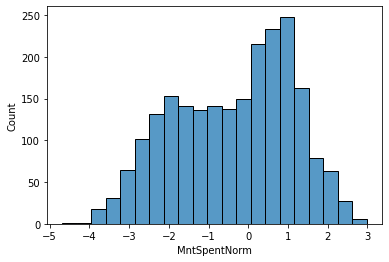

In [108]:
#data.drop(['MntSpentByLenCustomer'],axis=1)
data['MntSpentNorm']=data['MntTotal']/data['Len_Customer']
sns.histplot(np.log(data['MntSpentNorm'])) #Normalized amount spent
# I believe the negatives make sense since if we divide amount spend by a larger length customer 
# (eg, $100/200 days as customer), we'll have a number < 1=>Customer's hwo spend less than $1/day 
# will be mapped to the left of 0

In [109]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,age,NumKids,MntTotal,Income,LogIncome,NumChildren,HasChildren,HasPartner,NumTotalPurchases,AcceptedCmpTot,Len_Customer,MntSpentNorm
0,1826,1970,Bachelor,Divorced,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44,0,1190,84835.0,11.348475,0,0,0,16,0,110.0,10.818182
1,1,1961,Bachelor,Single,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53,0,577,57091.0,10.952419,0,0,0,23,1,111.0,5.198198
2,10476,1958,Bachelor,Married,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56,1,251,67267.0,11.116440,1,1,1,13,0,144.0,1.743056
3,1386,1967,Bachelor,Together,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47,2,11,32474.0,10.388226,2,1,1,11,0,146.0,0.075342
4,5371,1989,Bachelor,Single,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25,1,91,21474.0,9.974645,1,1,0,15,1,179.0,0.508380


In [111]:
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [113]:
fig =  px.pie (data, names = "Marital_Status", color_discrete_sequence=px.colors.sequential.RdBu)
fig.show ()

- From above it is clear that more than 60% appears to be the couples.

In [114]:
fig =  px.pie (data, names = "Education", color_discrete_sequence=px.colors.sequential.RdBu)
fig.show ()

### So Now its time to build Clustering model for analysis and business insights for growth in both Revenue and marketing.

- Using KMeans cluster alogs to group the customers according to similar behaviours.
- Futher analysis on the clusters to get insights for future improvemnts.

- __KMeans modeling will be done in Next Notebook__.

-------------------------------------------------------------------------------------------------------------------------------